# Lab 6: Downsampling/Upsampling Images

#### Goal of this part

In today's lab, you will learn about:

1. Colormaps and colorbars
2. **Downsampling** an image by removing rows and columns
3. **Upsampling** an image by averaging the values of two nearby pixels

You will also learn how to use `while loops` in Python.

## 0.0 Background

For today's lab, we first need to familiriaze with the following basic concepts. The exposition for this part is adapted from Chapters 5.1 and 7.3 of the [Think Python book](https://greenteapress.com/wp/think-python-2e/).
Read the following before you start. You will need this knowledge to complete the later parts of the assignment.

#### Floor division and modulo operation
The floor division operator, //, divides two numbers and rounds down to an integer. For
example, suppose the run time of a movie is 105 minutes. You might want to know how
long that is in hours. Conventional division returns a floating-point number:

In [124]:
minutes = 105
minutes / 60

1.75

But we don’t normally write hours with decimal points. Floor division returns the integer number of hours, rounding down:

In [125]:
minutes = 105
hours = minutes // 60
hours

1

To get the remainder, you could subtract off one hour in minutes:

In [126]:
remainder = minutes - hours * 60
remainder

45

An alternative is to use the **modulus operator**, % , which divides two numbers and returns
the remainder.

In [127]:
remainder = minutes % 60
remainder

45

#### Logical Operators
There are three logical operators: **and**, **or**, and **not**. 

The semantics (meaning) of these operators is similar to their meaning in English. 

For example, x > 0 and x < 10 is true only if x is greater than 0 and less than 10.

n%2 == 0 or n%3 == 0 is true if either or both of the conditions is true, that is, if the number is divisible by 2 or 3.

Finally, the not operator negates a boolean expression, so not (x > y) is true if x > y is false, that is, if x is less than or equal to y.

#### While loops

We have encountered already so many times the need to perform **iteration** when programming. Because iteration is so common, Python provides language features to make it easier. Thus far, we have used one of these features:  the `for statement`. Another one is the `while statement`. Here is a version of countdown that uses a while statement:

In [128]:
def countdown(n):
    while n > 0:
        print(n)
        n = n - 1
    print('Blastoff!')

You can almost read the while statement as if it were English. It means, “While n is greater
than 0, display the value of n and then decrement n. When you get to 0, display the word
Blastoff!”
More formally, here is the flow of execution for a while statement:
1. Determine whether the condition is true or false.
2. If false, exit the while statement and continue execution at the next statement.
3. If the condition is true, run the body and then go back to step 1.

<font color='red'>**Exercise 0.0.1**</font> Call the function above for $n=12$ and $n=-2$.

In [129]:
countdown(12)

12
11
10
9
8
7
6
5
4
3
2
1
Blastoff!


In [130]:
countdown(-2)

Blastoff!


This type of flow is called a **loop** because the third step loops back around to the top.
The body of the loop should change the value of one or more variables so that the condition
becomes false eventually and the loop terminates. Otherwise the loop will repeat forever,
which is called **an infinite loop**. 

In the case of countdown, we can prove that the loop terminates: if n is zero or negative, the
loop never runs. Otherwise, n gets smaller each time through the loop, so eventually we
have to get to 0.

<font color='red'>**Exercise 0.0.2**</font> Use the **while statement** and the **modulo operator** to define a Python function that takes as input an integer $n$ and prints all integers that are smaller or equal than $n$ and are perfectly divisible by 3.

In [131]:
def ints_div_3(n):
    i = 0
    while True:
        if (3*i)<=n:
            print(3*i,end = ", ") 
        else:
            break
        i += 1

Call the function for $n=3, 22$ and $100$.

In [132]:
ints_div_3(3)

0, 3, 

In [133]:
ints_div_3(22)

0, 3, 6, 9, 12, 15, 18, 21, 

In [134]:
ints_div_3(100)

0, 3, 6, 9, 12, 15, 18, 21, 24, 27, 30, 33, 36, 39, 42, 45, 48, 51, 54, 57, 60, 63, 66, 69, 72, 75, 78, 81, 84, 87, 90, 93, 96, 99, 

## 0.1 Notes From Previous Lab

We will follow lab5 to load images

In [135]:
# importing libraries from previous lab
import numpy as np
%matplotlib inline
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

In [136]:
# Read the image (Image should be in same folder as jupyter lab file, otherwise: define a proper path to image)
img = mpimg.imread('cat.jpg') 

In [137]:
# Recall that the image is stored as a 2D array
# check the type of image
print("type of image ", type(img))

type of image  <class 'numpy.ndarray'>


In [138]:
# Check the image dimensions
print("Dimension of Image ", img.shape)

rows = img.shape[0]
cols = img.shape[1]
# Total No of pixels in the image is 512 X 512

Dimension of Image  (512, 512)


In [139]:
#Check the Values in the image
print(img)

[[178 178 178 ... 127 128 126]
 [177 177 177 ... 125 128 127]
 [179 179 179 ... 123 127 128]
 ...
 [184 187 186 ...  96  96  97]
 [189 193 192 ...  97  97  98]
 [191 194 194 ...  98  98  99]]


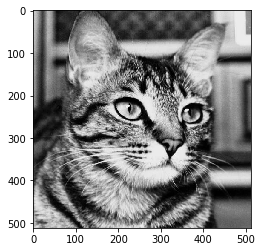

In [140]:
# view the image
plt.imshow(img, cmap="gray")

The command `mpimg.imread` stores the image into a 2D Numpy array. As we learnt a 2D Numpy array is a 2D matrix and each entry of the matrix corresponds to an image pixel. As any other matrix, the matrix `img` that you declared above has a **transpose**. 

<font color='red'>**Exercise 0.1.1**</font> Compute the transpose of the matrix `img`. Plot the "transpose image".

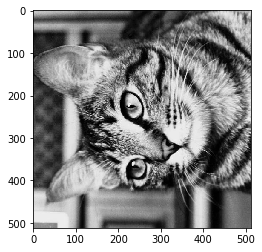

In [141]:
img_transpose = np.transpose(img)
plt.imshow(img_transpose,cmap="gray")

## 0.2 Not writable image
The command `mpimg.imread` loads the image and stores its values in a variable `img` of type 2D Numpy array. Since we have loaded this image from a file, Numpy automatically makes the numpy array `img` *non-writable*. This means you cannot manipulate this array directly. Instead, we can simply copy this image to a new numpy array and work with the later.

In [142]:
img2=img.copy()
##Now img2 is just a regular 2D numpy array

## 1.1 A bit more about greyscale images

Remember that in a grayscale image, the value of each pixel is *not* just black or white. Instead, it is common that each pixel takes 1 byte (8 bits) of storage resulting in 256 different states. If these states are mapped onto a ramp of greys from black to white the bitmap is refereed to as a greyscale image. 

By convention **0 is normally black** and **255 white**. The grey levels are the numbers in between, for example, in a linear scale 127 would be a 50% grey level. (Of course, this convention can be reversed.)

<font color='red'>**Exercise 1.1.0**</font> Define a Python function that takes as argument an image and returns the **minimum** and **maximum** values among all pixel values of that image.

In [143]:
def extreme_vals(IMG):
    max_val = IMG.max()
    min_val = IMG.min()
    return [max_val, min_val]

Call the function on the image of the cat that you loaded previously to find the min and max values of that image. 

In [144]:
print("The maximum value is:", extreme_vals(img)[0])
print("The minimum value is:", extreme_vals(img)[1])

The maximum value is: 232
The minimum value is: 0


#### Scale reference
We do not need to remember the convention that 0 is black and 255 is white. Instead, it is convenient to add a **color bar** next to the image when plotting it. This gives visual information of what color each pixel value represents!

Exectute the code below to add a colorbar.

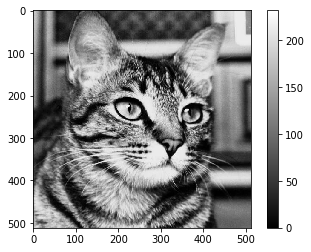

In [145]:
plt.imshow(img, cmap="gray")
plt.colorbar()

Now lets do something fun! We want to "close the eyes"" of this cat with a white stripe. 
To do this, we need to set the values of all pixels in rows 200 to 260 to the value corresponding to white, i.e. 255.

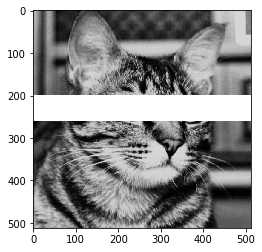

In [146]:
img2[200:260,:]= 255 ##For a horizontal stripe we need fixe some rows but accessing all the columns
plt.imshow(img2,cmap='gray')

<font color='red'>**Exercise 1.1.1**</font> Do the same thing as the code above, but this time use *black* to color the eyes of the cat. 

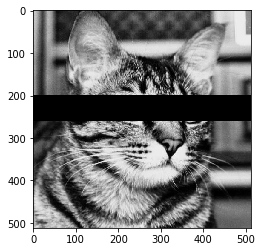

In [147]:
##We can do the same thing with an black strip also
img2[200:260,:]= 0
plt.imshow(img2,cmap='gray')

Run the cell below to undo the changes and plot again the original cat.

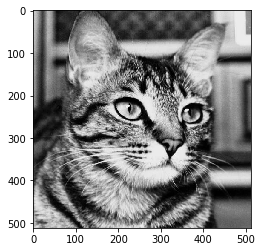

In [148]:
img2=img.copy()
plt.imshow(img2,cmap='gray')

<font color='red'>**Exercise 1.1.3**</font> Write a Python function that will take an image as an input and will "close" the eyes of the cat with two **vertical** stripes: a white one for the left eye and a black one for the right eye.

In [149]:
def blind_it(IMG):
    IMG[:,200:250]= 0 ##Vertical Right relative to cat
    IMG[:,350:400]= 255 ##Vertical Left relative to cat
    return IMG

Apply the function to the image of the cat and display the output.

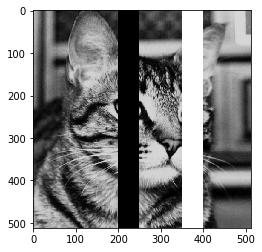

In [150]:
ClosedEyeImage = blind_it(img2)
plt.imshow(ClosedEyeImage, cmap="gray")

#### Applying pseudocolor schemes to image plots
Pseudocolor can be a useful tool for enhancing contrast and visualizing images more easily. This is especially useful when making presentations of your data using projectors - their contrast is typically quite poor.

Experiment with different colormaps below. See [here](https://matplotlib.org/3.1.1/tutorials/introductory/images.html) and [here](https://matplotlib.org/3.1.1/tutorials/colors/colormaps.html) for a list of colormap schemes available.

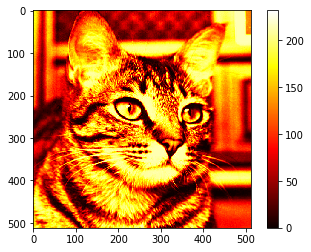

In [151]:
plt.imshow(img, cmap="hot")
plt.colorbar()

Note how adding the colormap is very useful information here!

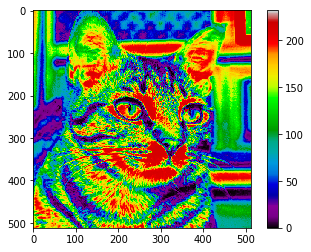

In [152]:
plt.imshow(img, cmap="nipy_spectral")
plt.colorbar()

<font color='red'>**Exercise 1.1.4**</font> Plot the image of the cat with your favorite colormap scheme from the list [here](https://matplotlib.org/3.1.1/tutorials/colors/colormaps.html).

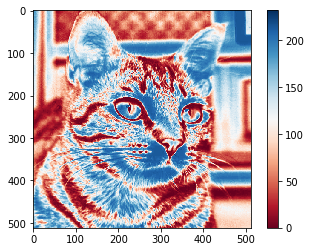

In [153]:
plt.imshow(img, cmap="RdBu")
plt.colorbar()

# 2.1 Downsampling an image

One of the basic operations in image processing is downsampling an image to a desired size.

Rembember that the images that we deal here with are **discrete** (or digital) 2D signals.  
For example, the image of the cat could be the output of a digital camera with a physical array of $512\times 512$  tiny light cavities or "photosites" used to record the image. When you press your camera's shutter button and the exposure begins, each of these is uncovered to collect photons and store those as an electrical signal. Once the exposure finishes, the camera closes each of these photosites, and then tries to assess how many photons fell into each cavity by measuring the strength of the electrical signal. The signals are then quantified as digital values and the value of each photosite corresponds to the value of one pixel. 

Often it is useful to reduce the size of the stored data. The process of further reducing the sampling rate of the signal (here, the $512\times 512$ image) is called **downsampling (or subsampling)**.

There are many ways to downsample an image. 
Perhpas the simplest one is to uniformly remove elements from the image by removing rows and columns. For example, in order to reduce the image size **by a factor of two** from $512X512$ down to $256X256$, we can do so by removing half the columns and rows of the image. 

<font color='red'>**Exercise 2.1.0**</font> Let us define a function that does this. Attempt to fill in the gaps. Read the comments inline. They should give you hints! Try to understand the functionality of the rest of the commands.

In [154]:
def downsample_image(IMG):
    
    # compute image dimensions
    dim = IMG.shape
    rows = dim[0]
    cols = dim[1]
    
    # set downsampling factor
    factor = 2             
    
    # initialize the size of the output image
    rows_out = int(rows/factor)
    cols_out = int(cols/factor)
    
    # initialize the output image as an array of ALL ZEROS
    img_out = np.zeros(( rows_out , cols_out ))
    
    # initialize index for rows
    i=0                
    
    while i < rows:
 
        # initialize index for columns
        j=0            
        
        while j<cols:
            
              img_out[int(i/factor),int(j/factor)] = IMG[i,j]
              
              j=j+factor    # update column index
            
        i=i+factor          # update row index
           
    return img_out

Call the function you defined above to see the output.

The size of the new image is: (256, 256)


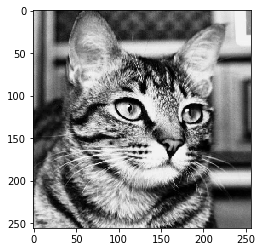

In [155]:
img2=img.copy()
down_image=downsample_image(img2)

print("The size of the new image is:", down_image.shape)

plt.imshow(down_image,cmap='gray')

Several things to notice about the `downsample_image` function. Two while loops are used to iterate through the image and they are incremented according to the factor. Also, while declaring result_img we force the indices to be integers as indices of numpy arrays only take integers and division operation in Python 3 returns by defaults float values.

 <font color='red'>**Exercise 2.1.2**</font> Change the content of the function `downsample_image` such that the column index j is initialized *outside* of the first while loop. 

In [156]:
def downsample_image_modified(IMG):
    # compute image dimensions
    dim = IMG.shape
    rows = dim[0]
    cols = dim[1]
    # set downsampling factor
    factor = 2
    # initialize the size of the output image
    rows_out = int(rows/factor)
    cols_out = int(cols/factor)
    # initialize the output image as an array of ALL ZEROS
    img_out = np.zeros(( rows_out , cols_out ))
    # initialize index for rows
    i = 0    
    j = 0
    while i < rows:
        while j<cols:
              img_out[int(i/factor),int(j/factor)] = IMG[i,j]
              j=j+factor    # update column index
        i=i+factor          # update row index
    return img_out

Call the function on the cat image. Can you explain why the output looks like this?

Initially, the loop is repeated with j re defined as 0 so the pixel drawn returned to the initial position and started drawing the next line now that j doesn't reset on every new line i, the pixels are drawn like stair ways down and out of the range of the matrix


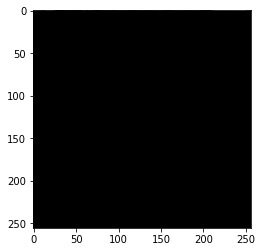

In [157]:
plt.imshow(downsample_image_modified(img2),cmap='gray')
print("Initially, the loop is repeated with j re defined as 0\
 so the pixel drawn returned to the initial position and started drawing the next line\
 now that j doesn't reset on every new line i, the pixels are drawn like stair ways down\
 and out of the range of the matrix\
")

<font color='red'>**Exercise 2.1.3**</font> Write a Python function `downsample_gen` which takes two imput arguments (1) an image and (2) the downsampling factor. The function will first check if the results of dividing the number of rows and columns of the image by the downsampling factor are integers. If not, then downsampling by removing equal number of rows and columns cannot be performed and the function outputs an error message. Otherwise, it computes and returns the downsampled image.

In [158]:
def downsample_gen(IMG,Factors):
    # compute image dimensions
    dim = IMG.shape
    rows = dim[0]
    cols = dim[1]
    factor = 1
    if(isinstance(Factors,int) and Factors >= 0):factor = Factors
    # initialize the size of the output image
    rows_out = int(rows/factor)
    cols_out = int(cols/factor)
    
    if rows%factor != 0 :
        print("Sorry! The reminder of the division of number of ROWS by the downsampling factor should be zero!")
        return
    elif cols%factor != 0:
        print("Sorry! The reminder of the division of number of COLUMNS by the downsampling factor should be zero!")
        return
    else: 
        img_out = np.zeros(( rows_out , cols_out ))
        i = 0   
        while i < rows:
            # initialize index for columns
            j = 0
            while j<cols:
                  img_out[int(i/factor),int(j/factor)] = IMG[i,j]
                  j=j+factor    # update column index
            i=i+factor          # update row index
        return img_out
    

<font color='red'>**Exercise 2.1.4**</font> Call your function on the image of the cat for the following values of the downsampling factor: 2,3,4,8,16. Notice how the image quality is degrading. 

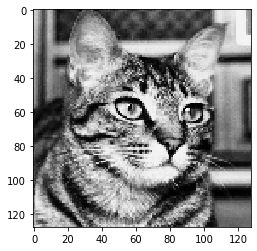

In [159]:
plt.imshow(downsample_gen(img2,4),cmap='gray')

### 2.2 Up-sampling an Image
It's evident that the downsampling process is not exacly reversible. You are basically throwing away information from an image. But in most of the images nearby pixels are closely related. We can use this relation to convert the downsampled image back to its original dimension. This process is known as upsampling.

There are many ways of doing upsampling, but in this lab we will try with averaging the values of two nearby pixels.

<font color='red'>**Exercise 2.2.1**</font> Complete the function for upsampling. While calculating next pixel be careful about the point closest to the edge

In [160]:
def upsample_image(IMG,factor=2):
    # compute image dimensions
    dim = IMG.shape
    rows = dim[0]
    cols = dim[1]
    # initialize the size of the output image
    rows_out = int(rows*factor)
    cols_out = int(cols*factor)
    img_out = np.zeros((rows_out,cols_out))
    i=0    
    while i < rows_out:
        j=0
        while j< cols_out:
             
              if j%factor==0 or i%factor==0:
                img_out[i,j] = IMG[int(i/factor),int(j/factor)]
                if((j + 1)/factor <= cols - 1):
                    previous_pixel = IMG[int(i/factor),int((j - 1)/factor)]
                    next_pixel = IMG[int(i/factor),int((j + 1)/factor)]
                
              else:
                
                img_out[i,j]=(previous_pixel+next_pixel)/2
                
              j = j + 1
        
        i= i + 1
           
    return img_out   

<font color='red'>**Exercise 2.2.1**</font> Show upsampled image for factors of 2, 4, 8 and 32. Use the already downsampled images that you created previously as inputs to the function.

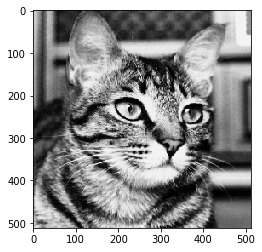

In [161]:
up_image=upsample_image(down_image)
plt.imshow(up_image,cmap='gray')

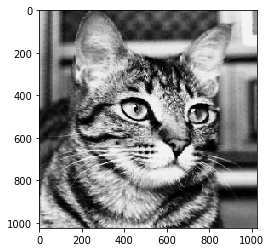

In [162]:
plt.imshow(upsample_image(down_image,4),cmap='gray')

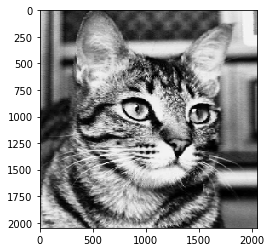

In [163]:
plt.imshow(upsample_image(down_image,8),cmap='gray')

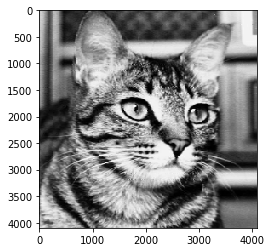

In [164]:
plt.imshow(upsample_image(down_image,16),cmap='gray')

In [165]:
plt.imshow(upsample_image(down_image,32),cmap='gray')

MemoryError: Unable to allocate array with shape (8192, 8192) and data type float64